In [17]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
plt.rcParams['figure.figsize'] = (15, 5)

数据源网址[NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [18]:
# because of mixed types we specify dtype to prevent any errors
complaints = pd.read_csv('../data/311-service-requests.csv', dtype='unicode')

# 2.1 数据长啥样

In [19]:
complaints

Unique Key            Created Date             Closed Date Agency                              Agency Name           Complaint Type                     Descriptor        Location Type Incident Zip      Incident Address      Street Name      Cross Street 1                    Cross Street 2   Intersection Street 1 Intersection Street 2  Address Type      City Landmark Facility Type    Status                Due Date Resolution Action Updated Date Community Board    Borough X Coordinate (State Plane) Y Coordinate (State Plane) Park Facility Name Park Borough  School Name School Number School Region  School Code School Phone Number                                     School Address  School City School State   School Zip School Not Found School or Citywide Complaint Vehicle Type Taxi Company Borough Taxi Pick Up Location Bridge Highway Name Bridge Highway Direction Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name            Latitude           Longitude                                  Location
0        26589651  10/31/2013 02:08:41 AM                     NaN   NYPD          New York City Police Department  Noise - Street/Sidewalk                   Loud Talking      Street/Sidewalk        11432      90-03 169 STREET       169 STREET           90 AVENUE                         91 AVENUE                     NaN                   NaN       ADDRESS   JAMAICA      NaN      Precinct  Assigned  10/31/2013 10:08:41 AM         10/31/2013 02:35:17 AM       12 QUEENS     QUEENS                    1042027                     197389        Unspecified       QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified                                        Unspecified  Unspecified  Unspecified  Unspecified                N                          NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN   40.70827532593202  -73.79160395779721   (40.70827532593202, -73.79160395779721)
1        26593698  10/31/2013 02:01:04 AM                     NaN   NYPD          New York City Police Department          Illegal Parking   Commercial Overnight Parking      Street/Sidewalk        11378             58 AVENUE        58 AVENUE            58 PLACE                         59 STREET                     NaN                   NaN     BLOCKFACE   MASPETH      NaN      Precinct      Open  10/31/2013 10:01:04 AM                            NaN       05 QUEENS     QUEENS                    1009349                     201984        Unspecified       QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified                                        Unspecified  Unspecified  Unspecified  Unspecified                N                          NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.721040535628305  -73.90945306791765  (40.721040535628305, -73.90945306791765)
2        26594139  10/31/2013 02:00:24 AM  10/31/2013 02:40:32 AM   NYPD          New York City Police Department       Noise - Commercial               Loud Music/Party  Club/Bar/Restaurant        10032         4060 BROADWAY         BROADWAY     WEST 171 STREET                   WEST 172 STREET                     NaN                   NaN       ADDRESS  NEW YORK      NaN      Precinct    Closed  10/31/2013 10:00:24 AM         10/31/2013 02:39:42 AM    12 MANHATTAN  MANHATTAN                    1001088                     246531        Unspecified    MANHATTAN  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified                                        Unspecified  Unspecified  Unspecified  Unspecified                N                          NaN          NaN                  NaN                   NaN                 NaN                

limit_output extension: Maximum message size of 10000 exceeded with 16880 characters

# 2.2 选择行和列


选择某列

In [20]:
complaints['Complaint Type']

0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type, Length: 111069, dtype: object

前5行

In [21]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027,197389,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349,201984,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088,246531,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730,222727,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815,233545,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


某列的前5行

In [22]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

前5行的 某列

In [23]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

# 2.3 选择多列

使用 列名列表即可

In [24]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


这两列的前10行

In [25]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


# 2.4 最常见的投诉类型是什么呢

使用 `.value_counts()` 方法

In [29]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

最好把它画出来

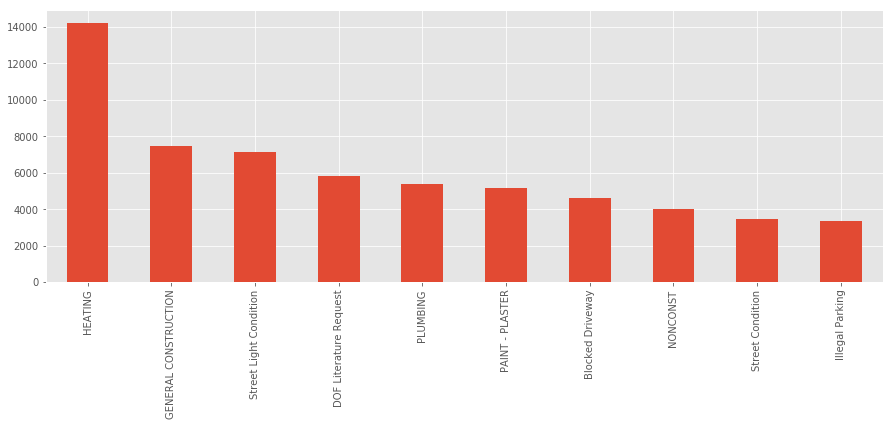

In [30]:
complaint_counts[:10].plot(kind='bar')

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  